# 범주형 데이터, 연속형 데이터 으로 분석하기

1. 독립변수가 범주형자료이고 종속변수가 범주형자료일때 교차분석을 한다

- 교차분석이란?
- 참고사이트 : [https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=aporia25&logNo=221156141366](https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=aporia25&logNo=221156141366)


교차분석(cross-tabulation analysis)은 '범주형'으로 구성된 자료들 간의 연관관계를 확인하기 위해 교차표를 만들어 관계를 확인하는 분석 방법을 말한다. 이 방법에서는 변수들의 빈도를 이용하여 연관성을 파악하는데, 이 때 검정통계량으로 카이제곱($\chi^2$) 통계량을 이용한다. 이 때문에 교차분석은 카이제곱($\chi^2$) 검정이라고도 불린다.

귀무가설: 기대도수와 관측도수 간에 차이가 없다 

대립가설: 기대도수와 관측도수 간에 차이가 있다 





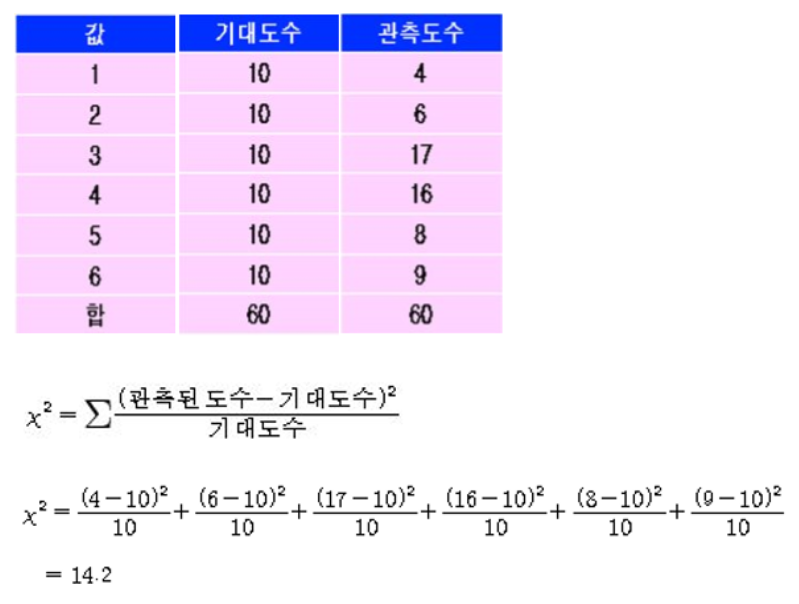

2. 독립변수가 범주형자료이고 종속변수가 연속형자료일때 t-test 또는 분산분석(ANOVA)을 한다

- 독립변수 범주가 2개일때 t-test

- 독립변수 범주가 3개 이상일때 분산분석

3. 독립변수가 연속형자료이고 종속변수가 연속형자료일때 상관관계분석 또는 
선형회귀분석을 한다

4. 독립변수가 연속형자료이고 종속변수가 범주형자료일때 로지스틱 회귀분석 또는 
판별분석 또는 군집분석을 한다

In [6]:
# 실습 예제
a <- read.csv('cosmetics.csv', header = T, sep = ',')
head(a)

gender,marriage,edu,job,mincome,aware,count,amount,decision,propensity,skin,promo,location,satisf_b,satisf_i,satisf_al,repurchase
1,1,4,1,2,2,1,11000,2,1,1,1,2,5,2,2,2
2,1,4,9,2,1,4,30000,1,1,3,2,3,2,3,3,4
2,2,4,4,3,1,6,100000,3,2,3,2,2,4,5,4,4
2,2,4,7,5,2,6,65000,3,2,5,2,3,3,4,4,4
1,2,6,6,5,2,2,50000,2,2,3,2,3,3,3,3,3
2,2,2,7,3,1,2,100000,2,1,4,2,3,3,4,4,3


In [17]:
str(a)

'data.frame':	247 obs. of  17 variables:
 $ gender    : Factor w/ 2 levels "1","2": 1 2 2 2 1 2 2 1 2 2 ...
 $ marriage  : int  1 1 2 2 2 2 1 1 2 2 ...
 $ edu       : int  4 4 4 4 6 2 6 6 4 4 ...
 $ job       : int  1 9 4 7 6 7 4 4 5 5 ...
 $ mincome   : int  2 2 3 5 5 3 5 5 2 2 ...
 $ aware     : int  2 1 1 2 2 1 1 4 2 1 ...
 $ count     : int  1 4 6 6 2 2 5 10 2 2 ...
 $ amount    : int  11000 30000 100000 65000 50000 100000 100000 39000 40000 100000 ...
 $ decision  : int  2 1 3 3 2 2 3 3 3 3 ...
 $ propensity: int  1 1 2 2 2 1 2 2 2 3 ...
 $ skin      : int  1 3 3 5 3 4 5 2 3 3 ...
 $ promo     : int  1 2 2 2 2 2 2 1 2 1 ...
 $ location  : int  2 3 2 3 3 3 3 2 3 3 ...
 $ satisf_b  : int  5 2 4 3 3 3 2 4 3 2 ...
 $ satisf_i  : int  2 3 5 4 3 4 2 4 4 3 ...
 $ satisf_al : int  2 3 4 4 3 4 3 4 4 4 ...
 $ repurchase: int  2 4 4 4 3 3 4 4 4 4 ...


In [7]:
table(a$gender)


  1   2 
132 115 

In [8]:
table(a$marriage)


  1   2 
 71 176 

In [11]:
attach(a) # $사용안해도 됨

The following objects are masked from a (pos = 3):

    amount, aware, count, decision, edu, gender, job, location,
    marriage, mincome, promo, propensity, repurchase, satisf_al,
    satisf_b, satisf_i, skin

The following objects are masked from a (pos = 4):

    amount, aware, count, decision, edu, gender, job, location,
    marriage, mincome, promo, propensity, repurchase, satisf_al,
    satisf_b, satisf_i, skin



In [12]:
table(gender)

gender
  1   2 
132 115 

In [13]:
table(job)

job
 1  2  3  4  5  6  7  8  9 10 
13 23 39 89  8 19 27 14  6  9 

In [14]:
detach(a)

In [18]:
a$gender<-factor(a$gender, levels=c(1,2), labels = c('male','female'))

In [20]:
str(a)

'data.frame':	247 obs. of  17 variables:
 $ gender    : Factor w/ 2 levels "male","female": 1 2 2 2 1 2 2 1 2 2 ...
 $ marriage  : int  1 1 2 2 2 2 1 1 2 2 ...
 $ edu       : int  4 4 4 4 6 2 6 6 4 4 ...
 $ job       : int  1 9 4 7 6 7 4 4 5 5 ...
 $ mincome   : int  2 2 3 5 5 3 5 5 2 2 ...
 $ aware     : int  2 1 1 2 2 1 1 4 2 1 ...
 $ count     : int  1 4 6 6 2 2 5 10 2 2 ...
 $ amount    : int  11000 30000 100000 65000 50000 100000 100000 39000 40000 100000 ...
 $ decision  : int  2 1 3 3 2 2 3 3 3 3 ...
 $ propensity: int  1 1 2 2 2 1 2 2 2 3 ...
 $ skin      : int  1 3 3 5 3 4 5 2 3 3 ...
 $ promo     : int  1 2 2 2 2 2 2 1 2 1 ...
 $ location  : int  2 3 2 3 3 3 3 2 3 3 ...
 $ satisf_b  : int  5 2 4 3 3 3 2 4 3 2 ...
 $ satisf_i  : int  2 3 5 4 3 4 2 4 4 3 ...
 $ satisf_al : int  2 3 4 4 3 4 3 4 4 4 ...
 $ repurchase: int  2 4 4 4 3 3 4 4 4 4 ...


In [21]:
table(a$gender)


  male female 
   132    115 

In [23]:
install.packages('descr')

package 'descr' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpkzHEO6\downloaded_packages


In [24]:
library(descr)

Warning message:
"package 'descr' was built under R version 3.6.3"

,Frequency,Percent
male,132,53.4413
female,115,46.5587
Total,247,100.0000


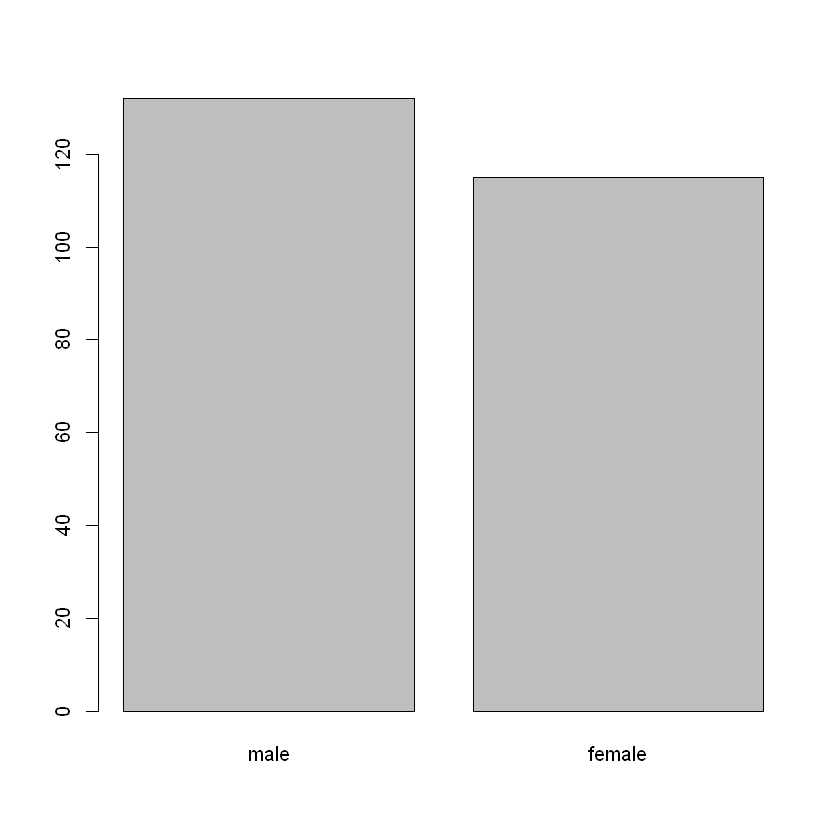

In [26]:
freq(a$gender) #freq 사용하려면 descr 라이브러리 설치해줘야 함

In [27]:
install.packages('ggplot2')
library(ggplot2)


  There is a binary version available but the source version is later:
        binary source needs_compilation
ggplot2  3.3.3  3.3.5             FALSE



installing the source package 'ggplot2'

Registered S3 methods overwritten by 'tibble':
  method     from  
  format.tbl pillar
  print.tbl  pillar


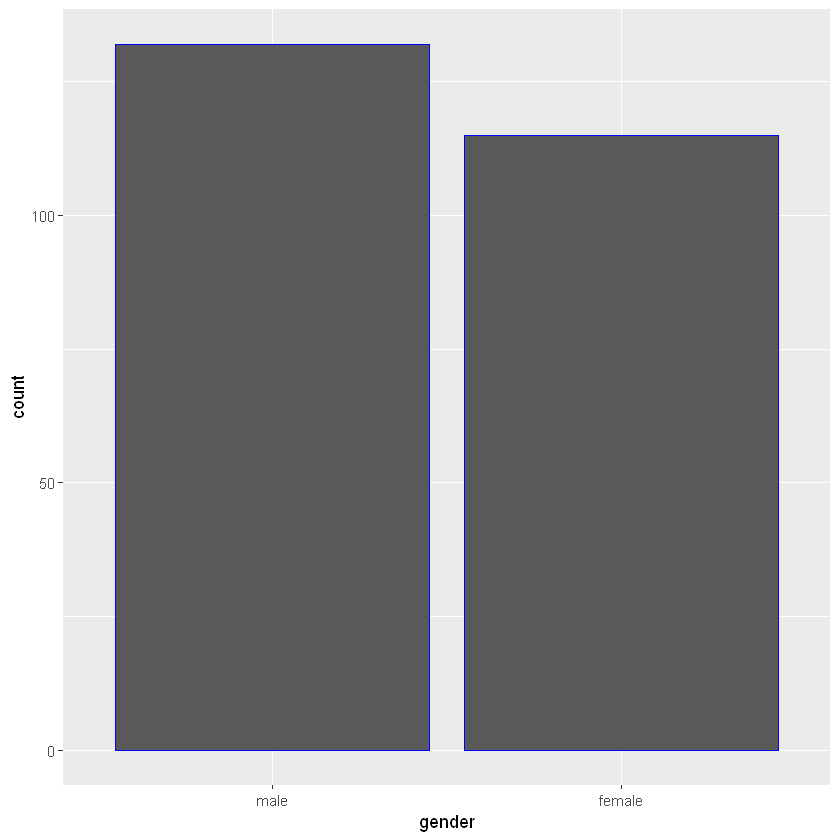

In [29]:
ggplot(a,aes(x=gender)) + geom_bar(color='blue')

In [30]:
attach(a)

The following objects are masked from a (pos = 5):

    amount, aware, count, decision, edu, gender, job, location,
    marriage, mincome, promo, propensity, repurchase, satisf_al,
    satisf_b, satisf_i, skin

The following objects are masked from a (pos = 6):

    amount, aware, count, decision, edu, gender, job, location,
    marriage, mincome, promo, propensity, repurchase, satisf_al,
    satisf_b, satisf_i, skin



,Frequency,Percent
2,30,12.1457490
3,9,3.6437247
4,136,55.0607287
5,2,0.8097166
6,29,11.7408907
7,15,6.0728745
8,26,10.5263158
Total,247,100.0000000


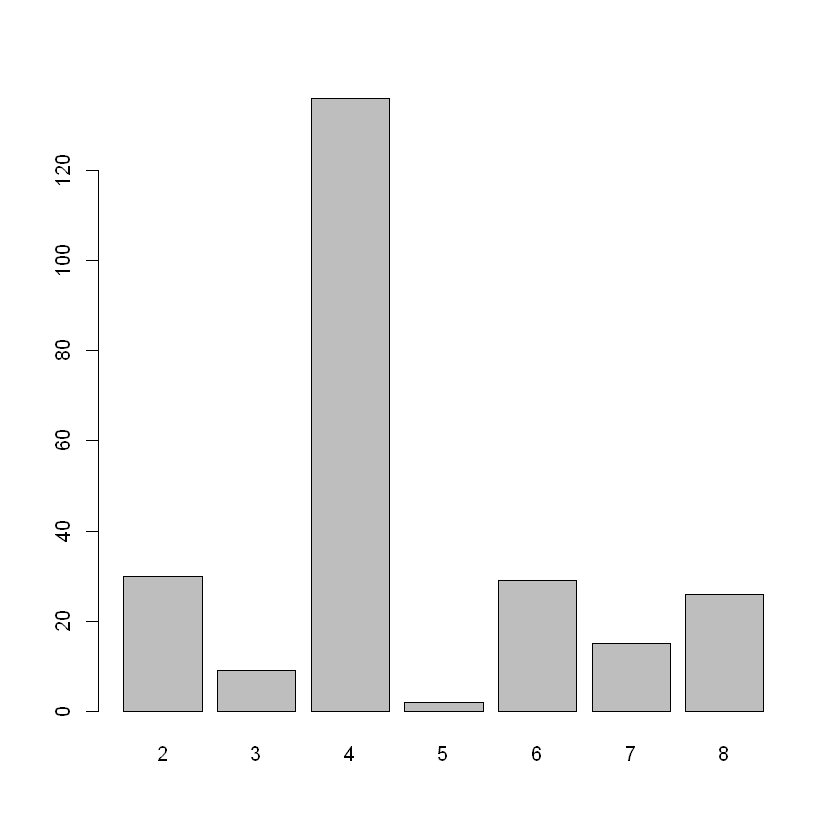

In [32]:
freq(edu)

In [34]:
install.packages('car')
library(car)

also installing the dependencies 'Rcpp', 'matrixStats', 'RcppArmadillo', 'SparseM', 'MatrixModels', 'conquer', 'sp', 'minqa', 'nloptr', 'RcppEigen', 'carData', 'abind', 'pbkrtest', 'quantreg', 'maptools', 'lme4'




  There are binary versions available but the source versions are later:
                  binary     source needs_compilation
Rcpp               1.0.6      1.0.7              TRUE
matrixStats       0.58.0     0.61.0              TRUE
RcppArmadillo 0.10.4.0.0 0.10.7.5.0              TRUE
conquer            1.0.2      1.2.1              TRUE
sp                 1.4-5      1.4-6              TRUE
nloptr           1.2.2.2    1.2.2.3              TRUE
carData            3.0-4      3.0-5             FALSE
quantreg            5.85       5.86              TRUE
maptools           1.1-1      1.1-2              TRUE
lme4              1.1-26   1.1-27.1              TRUE
car               3.0-10     3.0-12             FALSE

  Binaries will be installed
package 'Rcpp' successfully unpacked and MD5 sums checked


Warning message:
"cannot remove prior installation of package 'Rcpp'"Warning message in file.copy(savedcopy, lib, recursive = TRUE):
"C:\Users\MyCom\anaconda3\Lib\R\library\00LOCK\Rcpp\libs\x64\Rcpp.dll를 C:\Users\MyCom\anaconda3\Lib\R\library\Rcpp\libs\x64\Rcpp.dll로 복사하는데 문제가 발생했습니다: Permission denied"Warning message:
"restored 'Rcpp'"

package 'matrixStats' successfully unpacked and MD5 sums checked
package 'RcppArmadillo' successfully unpacked and MD5 sums checked
package 'SparseM' successfully unpacked and MD5 sums checked
package 'MatrixModels' successfully unpacked and MD5 sums checked
package 'conquer' successfully unpacked and MD5 sums checked
package 'sp' successfully unpacked and MD5 sums checked
package 'minqa' successfully unpacked and MD5 sums checked
package 'nloptr' successfully unpacked and MD5 sums checked
package 'RcppEigen' successfully unpacked and MD5 sums checked
package 'abind' successfully unpacked and MD5 sums checked
package 'pbkrtest' successfully unpacked and MD5 sums checked
package 'quantreg' successfully unpacked and MD5 sums checked
package 'maptools' successfully unpacked and MD5 sums checked
package 'lme4' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\MyCom\AppData\Local\Temp\RtmpkzHEO6\downloaded_packages


installing the source packages 'carData', 'car'

Loading required package: carData


In [42]:
a$eduM<-recode(edu,"lo:2=1; 3:4=2; 5:hi=3; else='NA'") # edu 컬럼 그대로 두고 eduM 컬럼 만들어 준다. 2를 1로 변경 , 3~4를 2로 변경 해준다.



,Frequency,Percent
1,30,12.14575
2,145,58.70445
3,72,29.14980
Total,247,100.00000


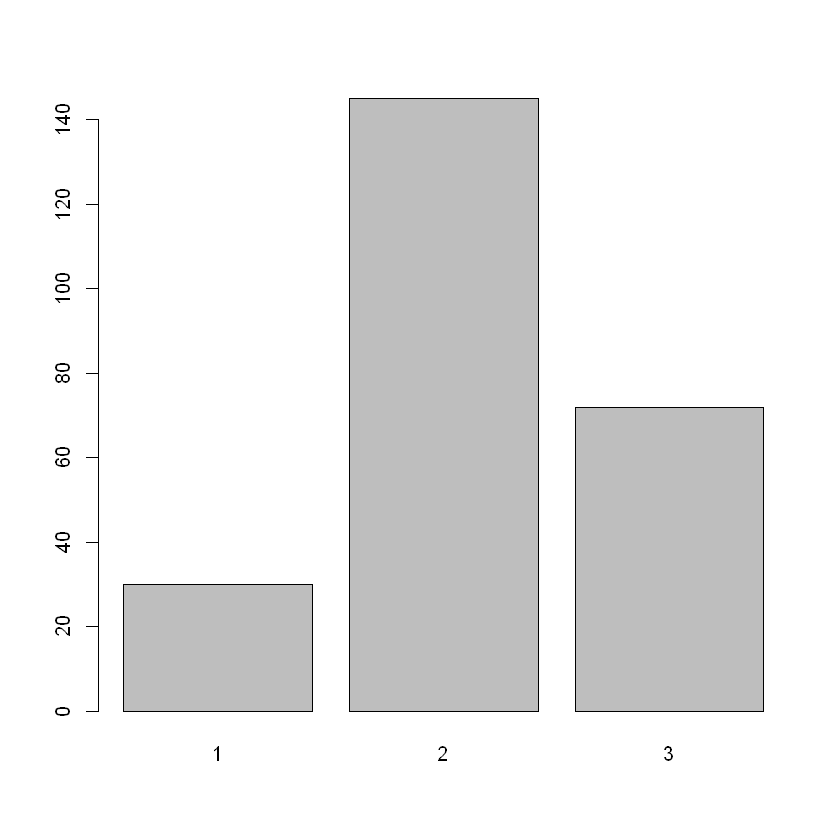

In [43]:
freq(a$eduM) #3집단으로 묶인것을 확인가능 

In [44]:
a$eduM <- factor(a$eduM, levels=c(1,2,3), labels=c('중졸이하','고졸이하','대졸이상'))

,Frequency,Percent
중졸이하,30,12.14575
고졸이하,145,58.70445
대졸이상,72,29.14980
Total,247,100.00000


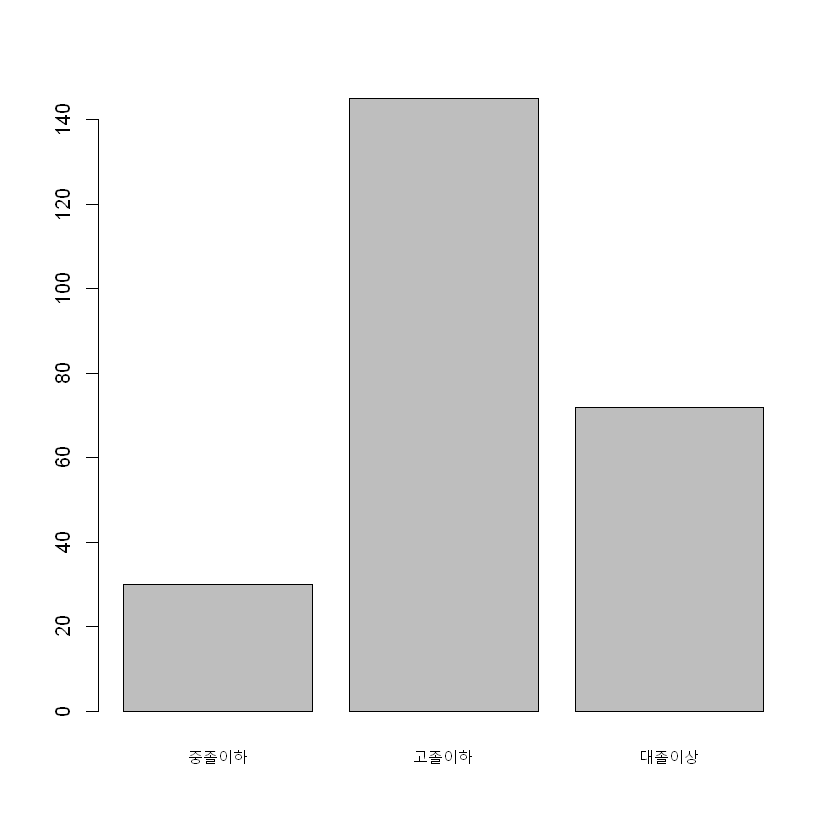

In [45]:
freq(a$eduM)

# 기술 통계

1. 중심화경향 
  
  - 평균 , 중위수 , 최빈값(Mode) => 중심은 어디인가?
  

2. 산포도 

  - 분산 : 편차의 제곱의 평균
  
  - 표준편차 : 분산에 루트를 씌운 값
  
  - 범위
  
  - 사분위범위
  
3. 분포도 
  
  - 왜도 : 좌우대칭정도
  
  - 첨도 : 뾰족함 정도 